In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1

from fastf1 import core,ergast,events,livetiming,plotting
from matplotlib.collections import LineCollection

# List of Events

In [2]:
year  = int(input("Enter F1 Season: "))
season_data = fastf1.get_event_schedule(year,include_testing=False)
season_data.drop(['Session1Date','Session2Date','Session3Date','Session4Date','Session5Date','F1ApiSupport'],axis=1,inplace=True)
print(f"Year : {year}")
season_data

Enter F1 Season: 2023


req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\namra\AppData\Local\Temp\fastf1.
	Size: 1.56 GB


Year : 2023


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1DateUtc,Session2,Session2DateUtc,Session3,Session3DateUtc,Session4,Session4DateUtc,Session5,Session5DateUtc
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 11:30:00,Practice 2,2023-03-03 15:00:00,Practice 3,2023-03-04 11:30:00,Qualifying,2023-03-04 15:00:00,Race,2023-03-05 15:00:00
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 13:30:00,Practice 2,2023-03-17 17:00:00,Practice 3,2023-03-18 13:30:00,Qualifying,2023-03-18 17:00:00,Race,2023-03-19 17:00:00
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02,Australian Grand Prix,conventional,Practice 1,2023-03-31 02:30:00,Practice 2,2023-03-31 06:00:00,Practice 3,2023-04-01 02:30:00,Qualifying,2023-04-01 06:00:00,Race,2023-04-02 05:00:00
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30,Azerbaijan Grand Prix,sprint_shootout,Practice 1,2023-04-28 09:30:00,Qualifying,2023-04-28 13:00:00,Sprint Shootout,2023-04-29 08:30:00,Sprint,2023-04-29 13:30:00,Race,2023-04-30 11:00:00
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07,Miami Grand Prix,conventional,Practice 1,2023-05-05 18:00:00,Practice 2,2023-05-05 21:30:00,Practice 3,2023-05-06 16:30:00,Qualifying,2023-05-06 20:00:00,Race,2023-05-07 19:30:00
6,6,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28,Monaco Grand Prix,conventional,Practice 1,2023-05-26 11:30:00,Practice 2,2023-05-26 15:00:00,Practice 3,2023-05-27 10:30:00,Qualifying,2023-05-27 14:00:00,Race,2023-05-28 13:00:00
7,7,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04,Spanish Grand Prix,conventional,Practice 1,2023-06-02 11:30:00,Practice 2,2023-06-02 15:00:00,Practice 3,2023-06-03 10:30:00,Qualifying,2023-06-03 14:00:00,Race,2023-06-04 13:00:00
8,8,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18,Canadian Grand Prix,conventional,Practice 1,2023-06-16 17:30:00,Practice 2,2023-06-16 20:30:00,Practice 3,2023-06-17 16:30:00,Qualifying,2023-06-17 20:00:00,Race,2023-06-18 18:00:00
9,9,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,2023-07-02,Austrian Grand Prix,sprint_shootout,Practice 1,2023-06-30 11:30:00,Qualifying,2023-06-30 15:00:00,Sprint Shootout,2023-07-01 10:00:00,Sprint,2023-07-01 14:30:00,Race,2023-07-02 13:00:00
10,10,Great Britain,Silverstone,FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023,2023-07-09,British Grand Prix,conventional,Practice 1,2023-07-07 11:30:00,Practice 2,2023-07-07 15:00:00,Practice 3,2023-07-08 10:30:00,Qualifying,2023-07-08 14:00:00,Race,2023-07-09 14:00:00


# Collecting Round No. and Session Data

In [3]:
round = int(input("Enter Round No."))
session = input("Pracrice 1: FP1, Pracrice 2: FP2, Pracrice 3: FP3, Sprint: S, Sprint-Shootout: SS, Qualifying : Q, Race: R \nEnter Session : ")

print(f"ROUND NO.: {round}\nSESSION: {session}")

race_data = fastf1.get_session(year, round, identifier=session)
race_data.load(laps=True, telemetry=True, weather=True, messages=True, livedata=None)

Enter Round No.10
Pracrice 1: FP1, Pracrice 2: FP2, Pracrice 3: FP3, Sprint: S, Sprint-Shootout: SS, Qualifying : Q, Race: R 
Enter Session : fp1


core           INFO 	Loading data for British Grand Prix - Practice 1 [v3.0.6]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...


ROUND NO.: 10
SESSION: fp1


req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            

# Podium Racer of the Round

In [4]:
podium = race_data.results[:3]
podium.drop(['BroadcastName','DriverId','TeamColor','TeamId','FirstName','LastName','CountryCode','ClassifiedPosition','Q1','Q2','Q3','HeadshotUrl'],axis=1,inplace=True)
podium

C:\Users\namra\AppData\Local\Temp\ipykernel_8852\3912636149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podium.drop(['BroadcastName','DriverId','TeamColor','TeamId','FirstName','LastName','CountryCode','ClassifiedPosition','Q1','Q2','Q3','HeadshotUrl'],axis=1,inplace=True)


,DriverNumber,Abbreviation,TeamName,FullName,Position,GridPosition,Time,Status,Points
1,1,VER,Red Bull Racing,Max Verstappen,NaN,NaN,NaT,,NaN
2,2,SAR,Williams,Logan Sargeant,NaN,NaN,NaT,,NaN
4,4,NOR,McLaren,Lando Norris,NaN,NaN,NaT,,NaN


# Fastest Lap Time of the Round

In [5]:
if year >2017:
    fast_lap = race_data.laps.pick_fastest()

    print(f"Fastest Lap Driver: {fast_lap['Driver']}")
    print(f"Fastest Driver Team: {fast_lap['Team']}")
    print(f"Fastest Driver Position: {fast_lap['Position']}")
    print(f"Fastest LapTime: {fast_lap['LapTime'].to_pytimedelta()}")
    print(f"Fastest LapNumber: {fast_lap['LapNumber']}")
    print(f"\t Fastest Sector 1: {fast_lap['Sector1Time'].to_pytimedelta()}")
    print(f"\t Fastest Sector 2: {fast_lap['Sector2Time'].to_pytimedelta()}")
    print(f"\t Fastest Sector 3: {fast_lap['Sector3Time'].to_pytimedelta()}")
else:
    print('Fatest Lap Data Only availabe from 2018 - Current')

Fastest Lap Driver: VER
Fastest Driver Team: Red Bull Racing
Fastest Driver Position: nan
Fastest LapTime: 0:01:28.600000
Fastest LapNumber: 22.0
	 Fastest Sector 1: 0:00:28.147000
	 Fastest Sector 2: 0:00:35.994000
	 Fastest Sector 3: 0:00:24.459000


# Driver Code for the Race

In [6]:
laps = race_data.laps

drivers = race_data.drivers
drivers = [race_data.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'SAR', 'NOR', 'GAS', 'PER', 'ALO', 'LEC', 'STR', 'MAG', 'DEV', 'TSU', 'ALB', 'ZHO', 'HUL', 'OCO', 'HAM', 'SAI', 'RUS', 'BOT', 'PIA']


# Tyre Strategies of the Race

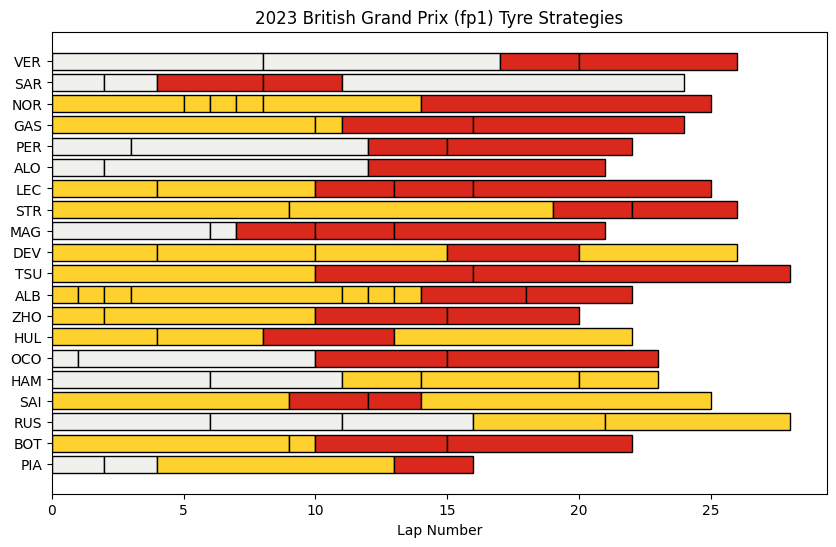

In [7]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

fig1, ax = plt.subplots(figsize=(10, 6))

plt.title(f"{year} {race_data.event['EventName']} ({session}) Tyre Strategies")
plt.xlabel("Lap Number")
plt.grid(False)

# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    # print(driver_stints)

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )


        previous_stint_end += row["StintLength"]

plt.show()

In [8]:
pod_1 = race_data.laps.pick_driver(podium['Abbreviation'][0]).pick_fastest()
pod_1_tel = pod_1.get_telemetry()
points_1 = np.array([pod_1_tel['X'].values, pod_1_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_1 = np.concatenate([points_1[:-1], points_1[1:]], axis=1)

pod_2 = race_data.laps.pick_driver(podium['Abbreviation'][1]).pick_fastest()
pod_2_tel = pod_2.get_telemetry()
points_2 = np.array([pod_2_tel['X'].values, pod_2_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_2 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)

pod_3 = race_data.laps.pick_driver(podium['Abbreviation'][2]).pick_fastest()
pod_3_tel = pod_3.get_telemetry()
points_3 = np.array([pod_3_tel['X'].values, pod_3_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_3 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)

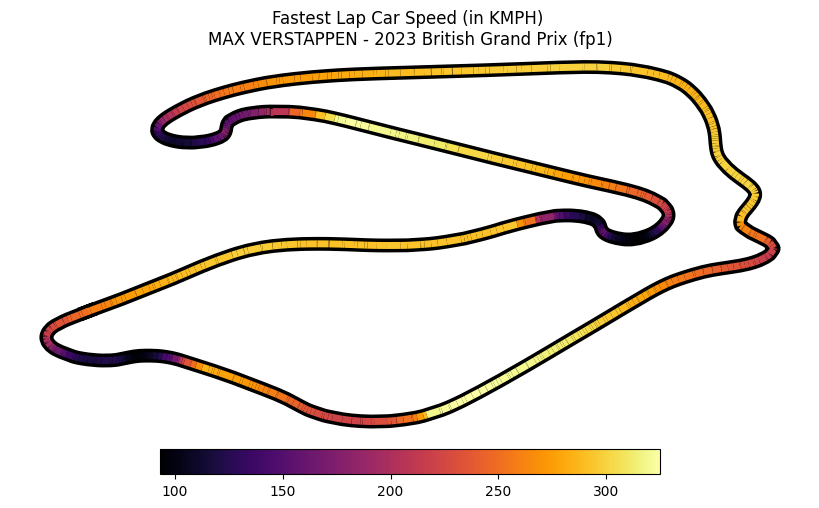

In [9]:
# Speed

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(figsize=(10,5))

fig.suptitle(
    f"Fastest Lap Car Speed (in KMPH) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['Speed'].min(), pod_1_tel['Speed'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Speed'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Speed'].min(), vmax=pod_1_tel['Speed'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

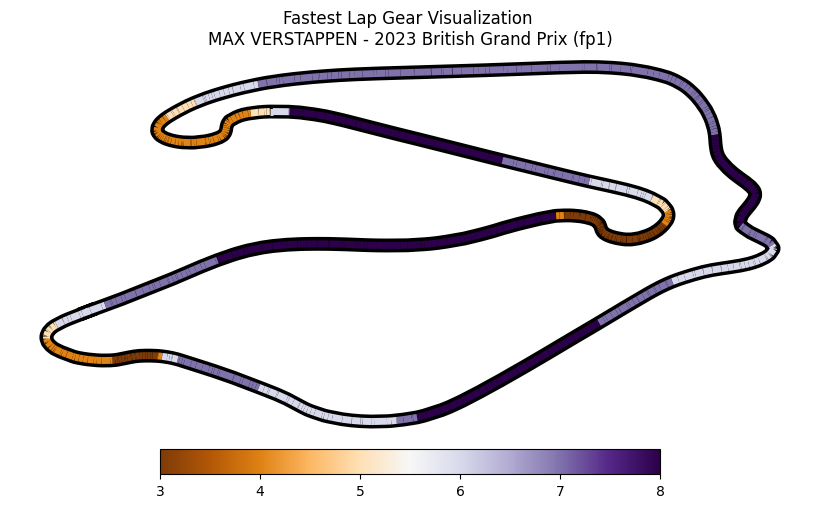

In [10]:
# Gear

cmap = matplotlib.colormaps['PuOr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5))

fig.suptitle(
    f"Fastest Lap Gear Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['nGear'].min(), pod_1_tel['nGear'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['nGear'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['nGear'].min(), vmax=pod_1_tel['nGear'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

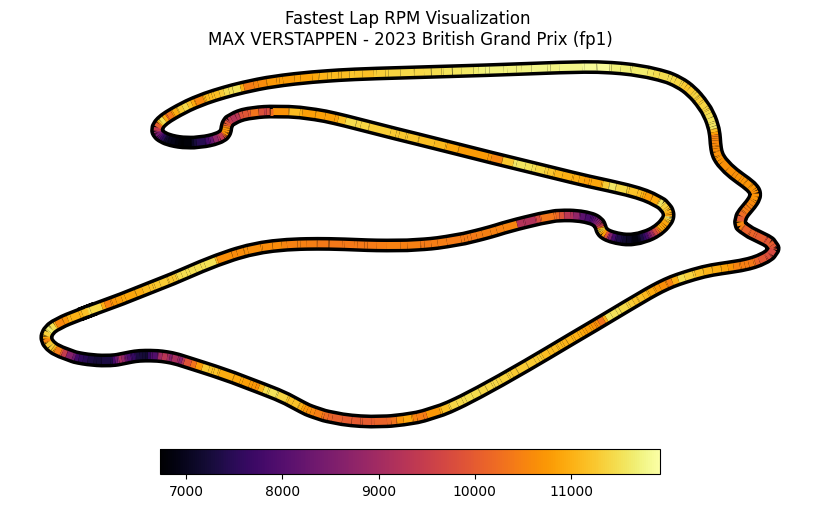

In [11]:
# RPM

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5))

fig.suptitle(
    f"Fastest Lap RPM Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['RPM'].min(), pod_1_tel['RPM'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['RPM'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['RPM'].min(), vmax=pod_1_tel['RPM'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

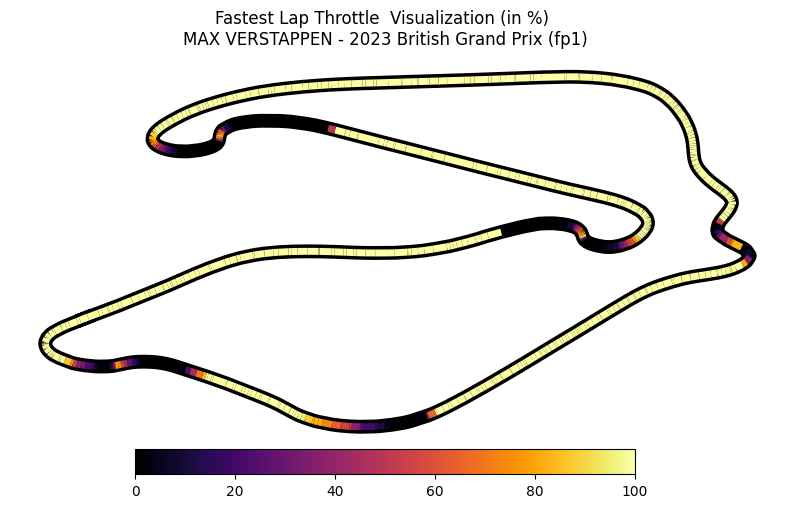

In [12]:
# Throttle

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5))

fig.suptitle(
    f"Fastest Lap Throttle  Visualization (in %) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['Throttle'].min(), pod_1_tel['Throttle'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Throttle'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Throttle'].min(), vmax=pod_1_tel['Throttle'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

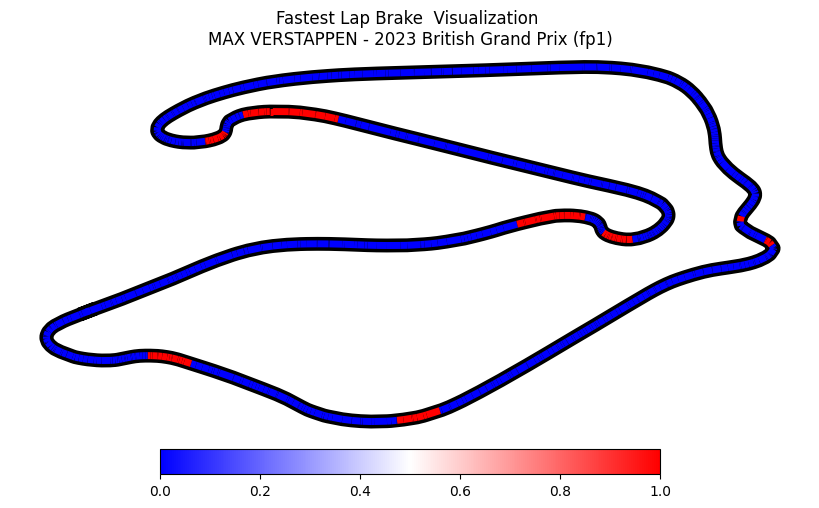

In [13]:
# Brake

cmap = matplotlib.colormaps['bwr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5))

fig.suptitle(
    f"Fastest Lap Brake  Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=10, zorder=0)

norm = plt.Normalize(pod_1_tel['Brake'].min(), pod_1_tel['Brake'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Brake'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Brake'].min(), vmax=pod_1_tel['Brake'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

In [14]:
# Lap Time Distributions of Racers

point_finishers = race_data.drivers
driver_laps = race_data.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

finishing_order = [race_data.get_driver(i)["Abbreviation"] for i in point_finishers]

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

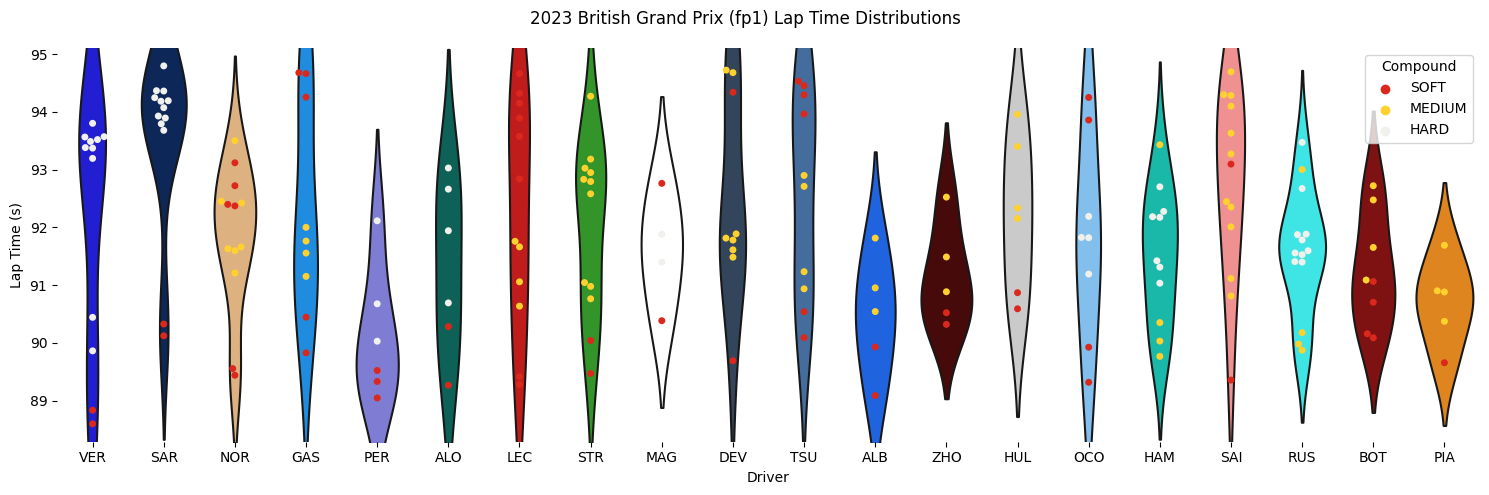

In [15]:
# create the figure
fig, ax = plt.subplots(figsize=(15, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               inner=None,
               scale="area",
               order=finishing_order,
               palette=driver_colors
               )

# plt.plot(data=driver_laps,x="Driver",y="LapTime(s)")

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )


ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle(f"{year} {race_data.event['EventName']} ({session}) Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [16]:
driver_laps['Stint'].value_counts()

Stint
2.0    44
1.0    40
3.0    33
4.0    32
5.0    24
6.0     6
8.0     1
9.0     1
Name: count, dtype: int64

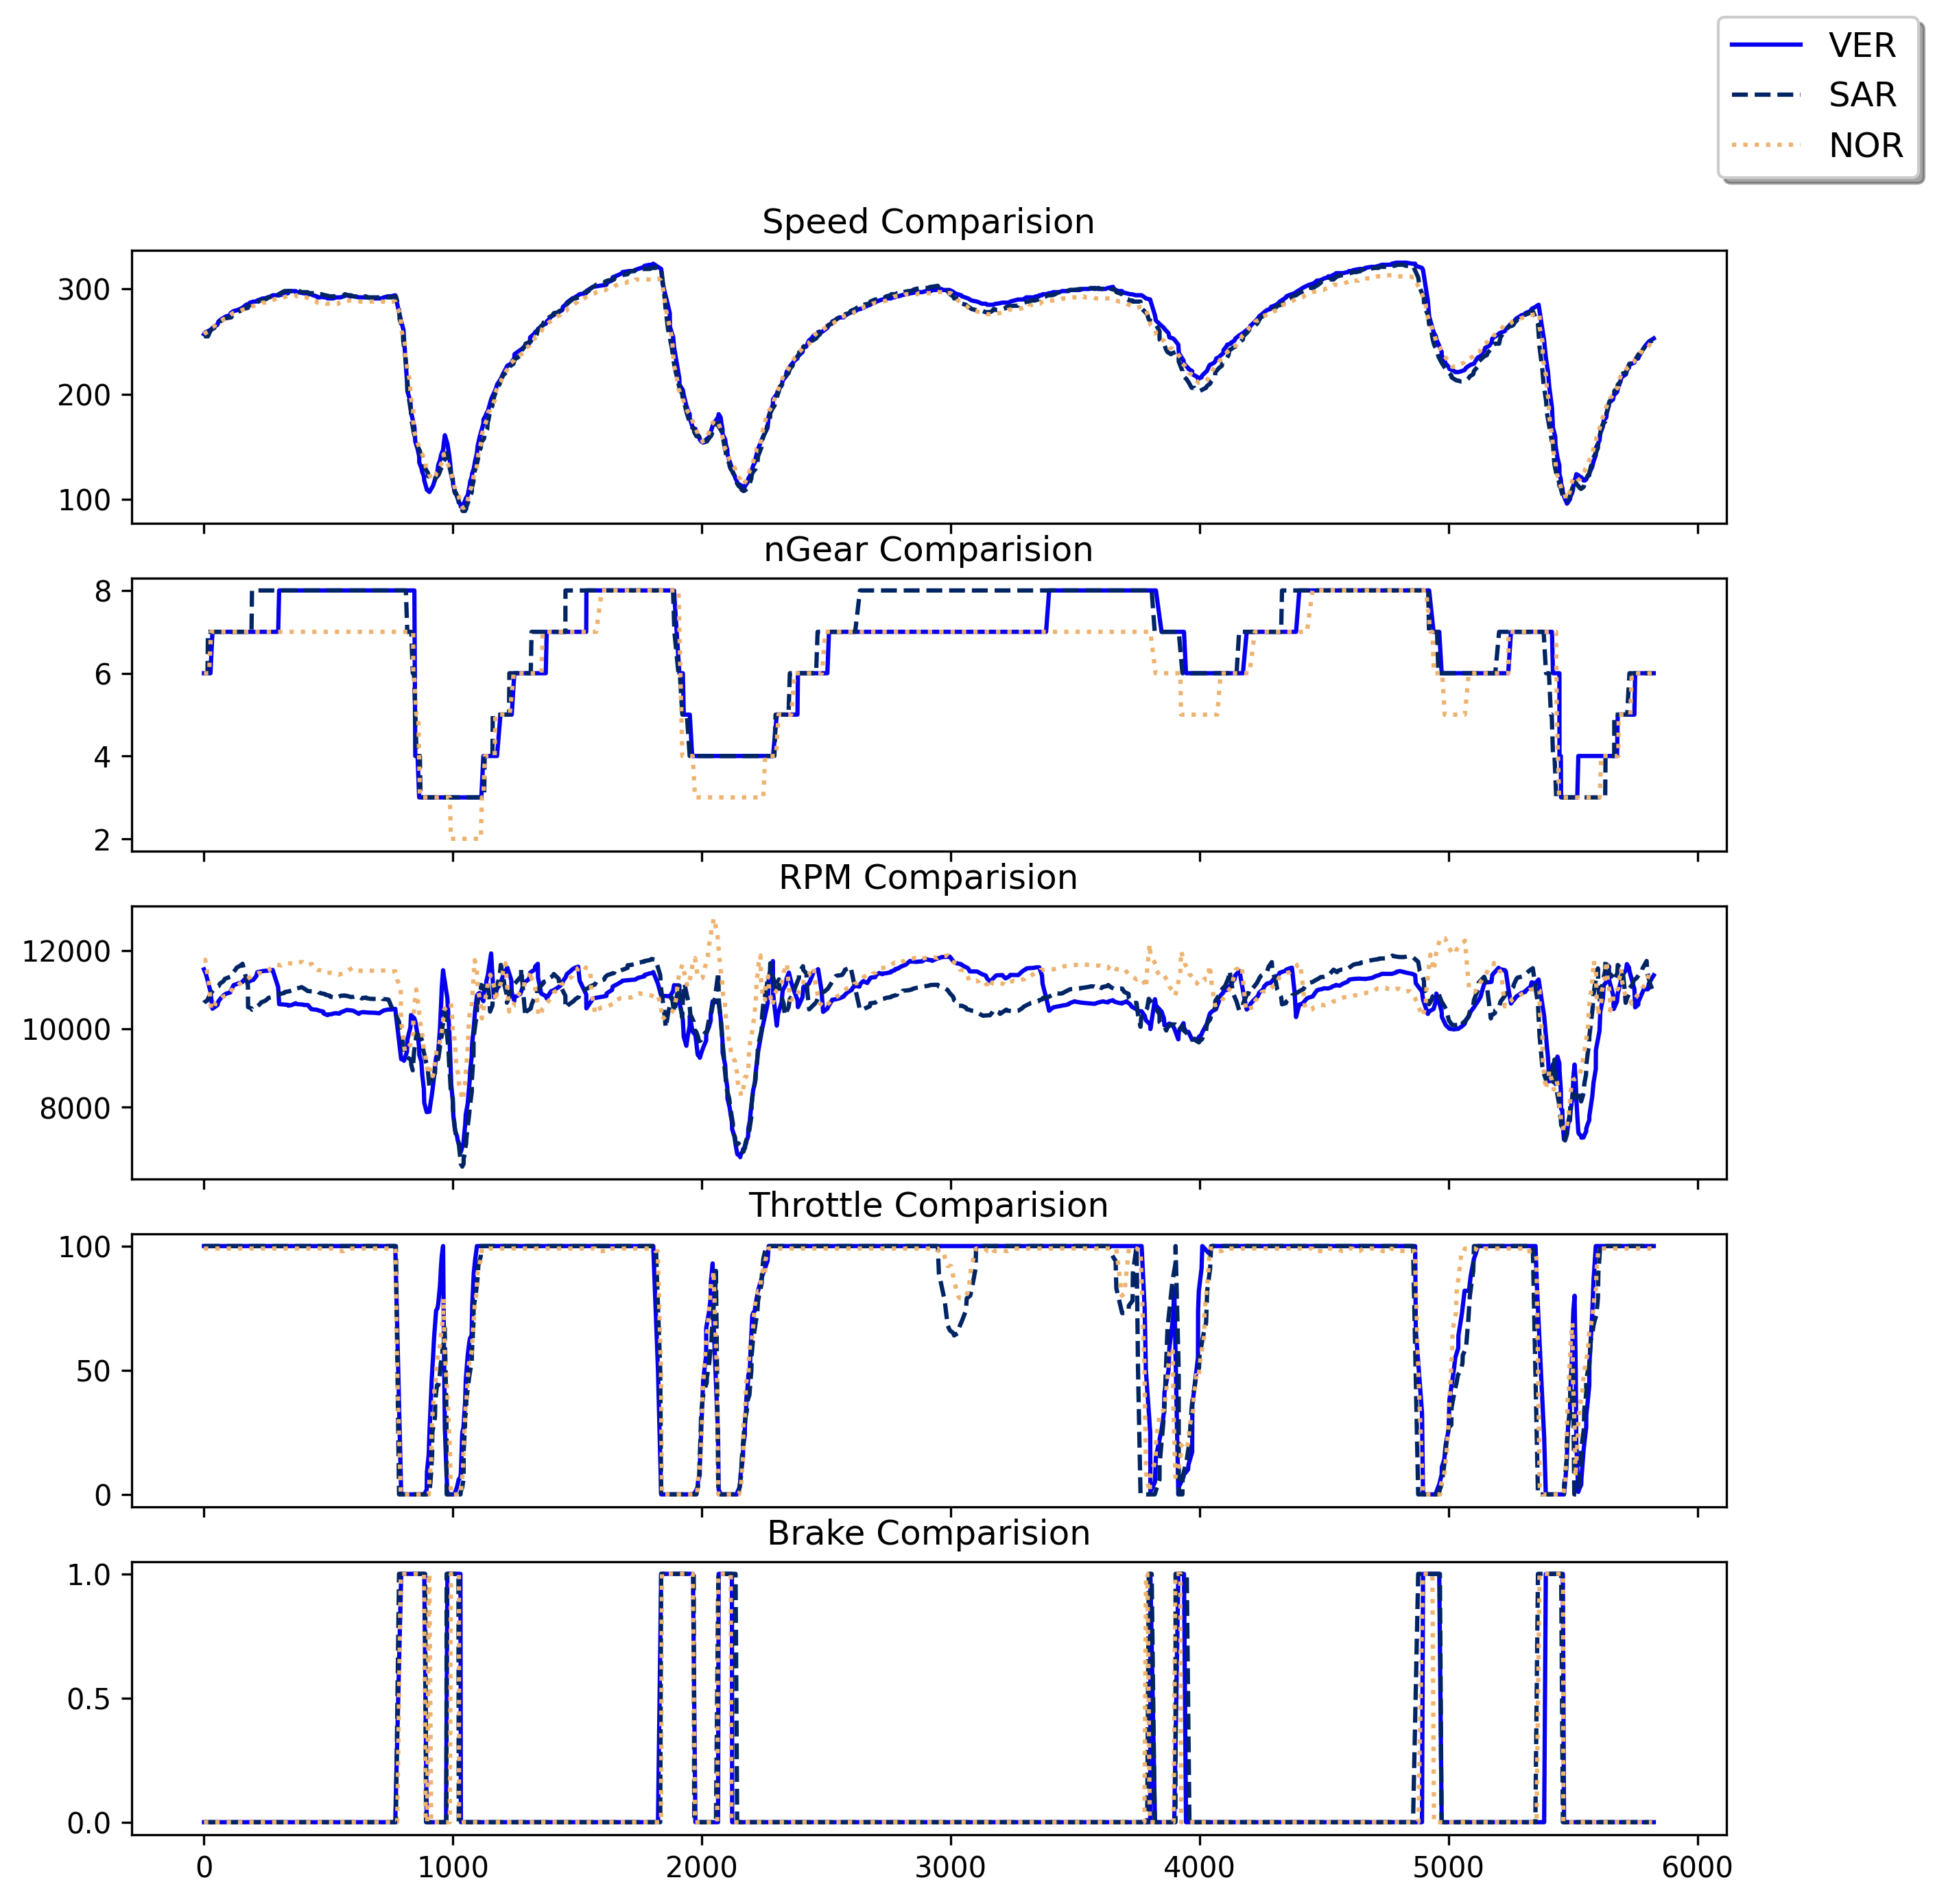

In [17]:
# POD_1
fig, axs = plt.subplots(5,sharex=True,figsize=(10,10),dpi = 300)
# plt.legend(frameon=False)

labels = [pod_1['Driver'],pod_2['Driver'],pod_3['Driver']]

axs[0].plot(pod_1_tel['Distance'], pod_1_tel['Speed'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[0].plot(pod_2_tel['Distance'], pod_2_tel['Speed'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[0].plot(pod_3_tel['Distance'], pod_3_tel['Speed'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[0].set_title('Speed Comparision')

axs[1].plot(pod_1_tel['Distance'], pod_1_tel['nGear'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[1].plot(pod_2_tel['Distance'], pod_2_tel['nGear'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[1].plot(pod_3_tel['Distance'], pod_3_tel['nGear'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[1].set_title('nGear Comparision')

axs[2].plot(pod_1_tel['Distance'], pod_1_tel['RPM'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[2].plot(pod_2_tel['Distance'], pod_2_tel['RPM'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[2].plot(pod_3_tel['Distance'], pod_3_tel['RPM'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[2].set_title('RPM Comparision')

axs[3].plot(pod_1_tel['Distance'], pod_1_tel['Throttle'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[3].plot(pod_2_tel['Distance'], pod_2_tel['Throttle'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[3].plot(pod_3_tel['Distance'], pod_3_tel['Throttle'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[3].set_title('Throttle Comparision')

axs[4].plot(pod_1_tel['Distance'], pod_1_tel['Brake'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[4].plot(pod_2_tel['Distance'], pod_2_tel['Brake'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[4].plot(pod_3_tel['Distance'], pod_3_tel['Brake'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[4].set_title('Brake Comparision')

fig.legend(labels=labels,loc="upper right",shadow=True,fontsize='12')


plt.show()